# **LOADING LIBRARIES AND DATA SET**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data_set = pd.read_csv('AAPL.csv')

In [ ]:
data_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


# **DATA CLEANING**

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


Total 7 columns are there in our data set

**Checking for null values**

In [ ]:
data_set.isnull().count()

Date         10468
Open         10468
High         10468
Low          10468
Close        10468
Adj Close    10468
Volume       10468
dtype: int64

In [ ]:
data_set.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There is no null values in our data set

**Checking for duplicate columns**

In [ ]:
data_set.duplicated().sum()

0

No duplicate rows found in the data set

Our dataset is preety clean...

# **Describing our data set**

In [ ]:
data_set.shape

(10468, 7)

10468 rows and 7 columns in our data set

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


only date column has a data type of object , all other columns are either floats or ints.

In [ ]:
data_set.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


**For our goal only Close cloumne is usefull...**

In [ ]:
df = data_set['Close']

In [ ]:
df


0          0.128348
1          0.121652
2          0.112723
3          0.115513
4          0.118862
            ...    
10463    131.880005
10464    132.759995
10465    135.429993
10466    130.059998
10467    131.559998
Name: Close, Length: 10468, dtype: float64

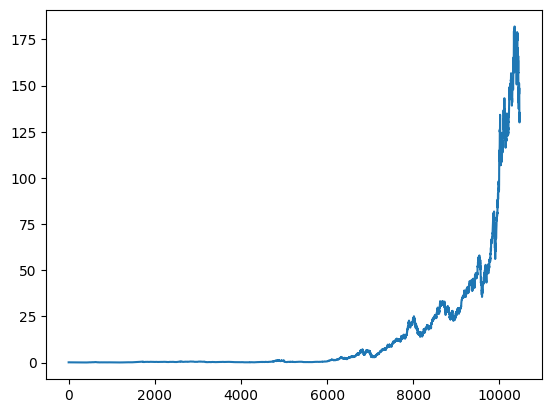

In [ ]:
plt.plot(df)

# **Towards building our model**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
df

array([[4.35483696e-04],
       [3.98684579e-04],
       [3.49613594e-04],
       ...,
       [7.44010911e-01],
       [7.14499102e-01],
       [7.22742631e-01]])

**splitting dataset into train and test split**

In [ ]:
training_size=int(len(df)*0.75)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [ ]:
training_size,test_size

(7851, 2617)

In [ ]:
train_data

array([[0.00043548],
       [0.00039868],
       [0.00034961],
       ...,
       [0.08361982],
       [0.08224589],
       [0.0873981 ]])

Converting array into dataset matrix

In [ ]:
def data_set_creation(data_set,time_step=1):
  x,y=[],[]
  for i in range(len(data_set)-time_step-1):
    a = data_set[i:(i+time_step),0]
    x.append(a)
    y.append(data_set[i+time_step,0])
  return np.array(x),np.array(y)

In [ ]:
time_step = 100
x_train,y_train = data_set_creation(train_data,time_step)
x_test,y_test = data_set_creation(test_data,time_step)

In [ ]:
print(x_train.shape), print(y_train.shape)

(7750, 100)
(7750,)


(None, None)

In [ ]:
print(x_test.shape), print(y_test.shape)

(2516, 100)
(2516,)


(None, None)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3,batch_size=64,verbose=1)

Epoch 1/3
122/122 [==============================] - 26s 212ms/step - loss: 1.0764e-06 - val_loss: 7.6557e-04
Epoch 2/3
122/122 [==============================] - 26s 215ms/step - loss: 1.1606e-06 - val_loss: 0.0016
Epoch 3/3
122/122 [==============================] - 24s 195ms/step - loss: 1.0535e-06 - val_loss: 8.8651e-04


**PREDICTION AND PERFORMANCE ANALYSIS**

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

79/79 [==============================] - 3s 36ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

**Calculate RMSE performance metrics**

In [ ]:

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3.4476843062843856

**Test Data RMSE**

In [ ]:

math.sqrt(mean_squared_error(y_test,test_predict))

66.76131681569548

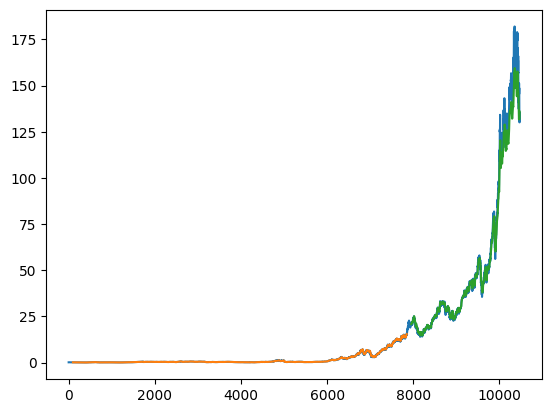

In [ ]:

# Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()